In [25]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import seaborn as sns


from global_config import config
import pandas as pd
import numpy as np
import rpy2
import os

from datetime import date, timedelta

data_dir_mnps   = config.get_property('geo_dir')
data_dir        = config.get_property('data_dir')
fb_ppl_data     = config.get_property('covid_fb')
results_dir     = config.get_property('results_dir')
data_cases_path = os.path.join(fb_ppl_data, 'agglomerated', 'geometry')


In [26]:

# Defines lockdowns
no_lock_lab = "No Lockdown Imposed"
lock_lab    = "Lockdown Imposed"


lockdowns = []
lockdowns.append({"code": "A",
                  "start_date" : pd.to_datetime("2020-07-13"),
                  "end_date"   : pd.to_datetime("2020-07-23"),
                  "places":["chapinero",
                            "los_martires",
                            "san_cristobal",
                            "tunjuelito",
                            "rafel_uribe_uribe",
                            "ciudad_bolivar",
                            "santa_fe",
                            "usme"]})

lockdowns.append({"code": "B",
                  "start_date" : pd.to_datetime("2020-07-23"),
                  "end_date"   : pd.to_datetime("2020-08-06"),
                  "places":["bosa",
                            "antonio_narino",
                            "kennedy",
                            "puente_aranda",
                            "fontibon"]})

lockdowns.append({"code": "C",
                  "start_date" : pd.to_datetime("2020-07-31"),
                  "end_date"   : pd.to_datetime("2020-08-14"),
                  "places":["suba",
                            "engativa",
                            "barrios_unidos"]})

lockdowns.append({
                  "code": "D",
                  "start_date" : pd.to_datetime("2020-08-16"),
                  "end_date"   : pd.to_datetime("2020-08-27"),
                  "places":["usaquen",
                            "chapinero",
                            "santa_fe",
                            "candelaria",
                            "teusaquillo",
                           "puente_aranda",
                           "antonio_narino"]})



In [27]:
from shapely.geometry import Point, LineString
from shapely.ops import cascaded_union

from datetime import timedelta
import contextily as ctx

import geopandas as gpd
from shapely import wkt

def read_geo_df(path_to_geodf):
    df_geo = pd.read_csv(path_to_geodf)
    df_geo['geometry'] = df_geo['geometry'].apply(wkt.loads)
    df_geo = gpd.GeoDataFrame(df_geo, geometry='geometry')

    return df_geo


all_data_df  = pd.read_csv(os.path.join(results_dir, "all_percentual_change_merged.csv"), parse_dates=["date"])
sse_info_df  = pd.read_csv(os.path.join(results_dir, "data", "censo", "variables.csv"))
shp_df       = gpd.read_file(os.path.join(results_dir, "data", "censo", "censo.shp"))
shp_df       = shp_df[['CODIGO_MZN', 'lat', 'lon', 'ESTRATO_MO', 'IPM', 'localidad', 'geometry']]
shp_df       = shp_df.dropna()

path_to_bog_polygon = os.path.join(data_dir_mnps, 'localities', 'localities_shapefile.shp')


# Read bogota polygons divided by localities.
polygons_bog = gpd.read_file( path_to_bog_polygon )
polygons_bog = polygons_bog.rename(columns={'location_i': 'location_id'})



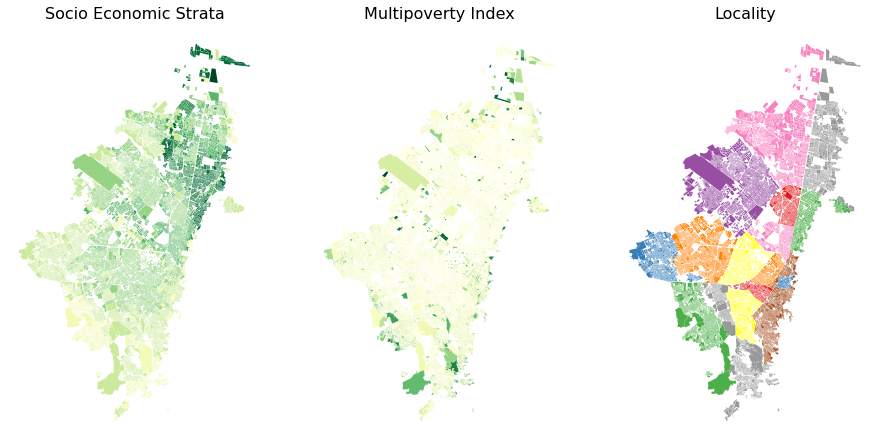

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15.5, 20.5))
#polygons_bog.plot(ax=ax[0], edgecolor='black', alpha=0.3, facecolor='white', linewidth=1)
#polygons_bog.plot(ax=ax[1], edgecolor='black', alpha=0.3, facecolor='white', linewidth=1)
#polygons_bog.plot(ax=ax[2], edgecolor='black', alpha=0.3, facecolor='white', linewidth=1)


# Plot values as linestring
shp_df.plot(ax=ax[0], column='ESTRATO_MO', cmap="YlGn")
shp_df.plot(ax=ax[1], column='IPM', cmap="YlGn")
shp_df.plot(ax=ax[2], column='localidad', cmap="Set1")

ax[0].set_title("Socio Economic Strata", fontsize = 16)
ax[1].set_title("Multipoverty Index", fontsize = 16)
ax[2].set_title("Locality", fontsize = 16)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()



In [54]:
def plot_sse(ipm_list, sse, sse_counts, locality=None):
    fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2))

    ax[0].bar(sse, sse_counts, facecolor='gray', edgecolor='k', alpha=0.5)
    ax[1].hist(ipm_list, facecolor='green', edgecolor='k', alpha=0.5, density=True)

    ax[0].set_title(f'Socio Economic Strata | {locality}')
    ax[1].set_title(f'Multipoverty Index | {locality}')

In [56]:
localidades_list = shp_df.localidad.unique()

df_all_ipm = []
for loc in localidades_list:
    loc_shp = shp_df[shp_df.localidad==loc]

    ipm, ipm_counts = np.unique(loc_shp.IPM, return_counts=True)
    sse, sse_counts = np.unique(loc_shp.ESTRATO_MO, return_counts=True)

    ipm_df = pd.DataFrame(data=loc_shp.IPM, columns=""
    plot_sse(loc_shp.IPM, sse, sse_counts, locality=loc)
    plt.close()

import seaborn as sns

In [69]:
df_ipm = shp_df[["IPM", "localidad"]].rename(columns={"IPM": "x"})
df_ipm

,x,localidad
0,2.8,Antonio Nariño
1,3.8,Antonio Nariño
2,1.5,Antonio Nariño
3,9.4,Antonio Nariño
4,8.2,Antonio Nariño
...,...,...
43350,14.3,Suba
43351,6.8,Suba
43352,18.6,Suba
43353,20.4,Suba


/Users/chaosdonkey06/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


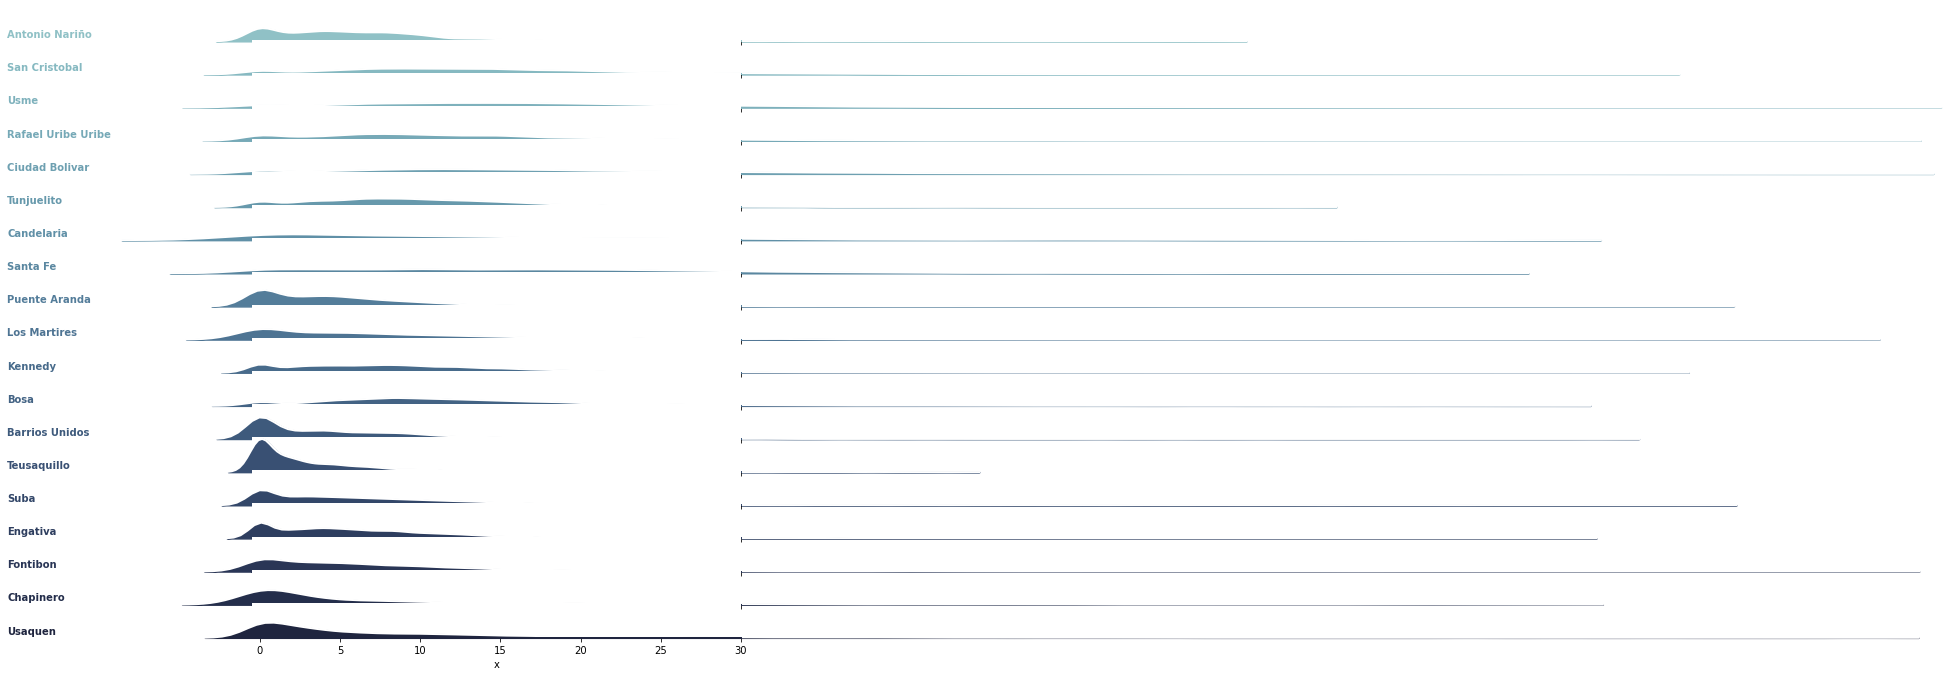

In [83]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(df_ipm.localidad.unique().shape[0], rot=-.25, light=.7)
g = sns.FacetGrid(df_ipm, row="localidad", hue="localidad", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.5, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
    ax.set_xlim([-0.5, 30])


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.05)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


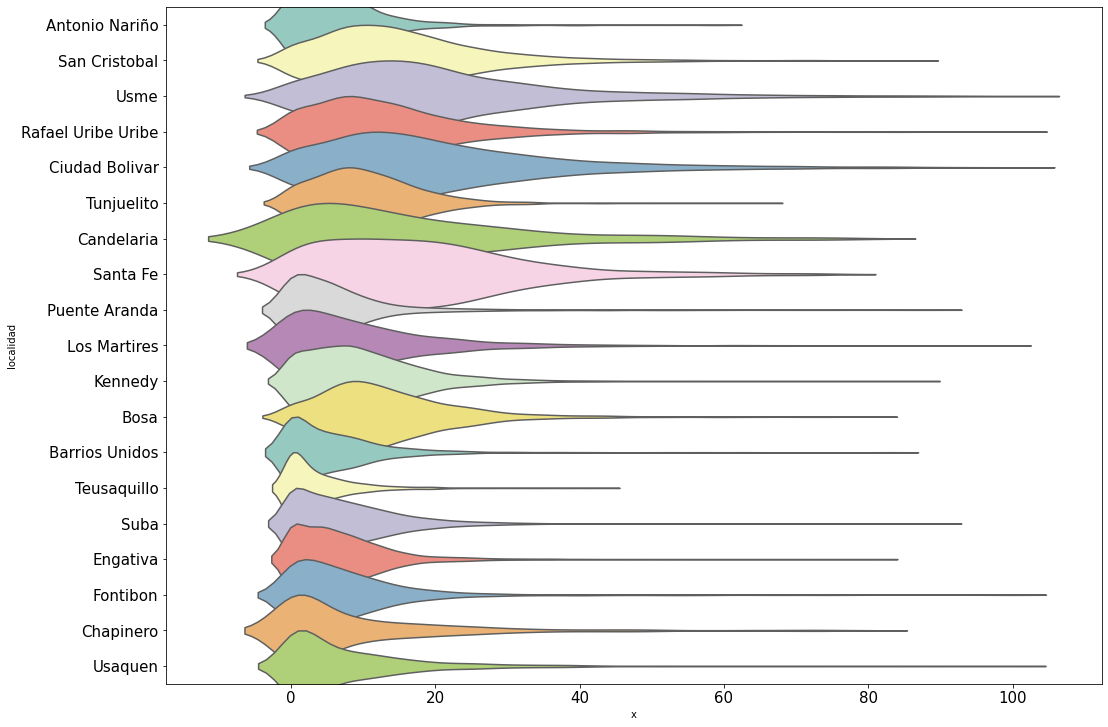

In [109]:
fig, ax = plt.subplots(1,1,figsize=(15.5, 10.2))

sns.violinplot(x="x", y="localidad",
            data=df_ipm,
            scale="width", palette="Set3", inner=None,
            height=15.5, width=2, ax =ax, trim=True)
ax.tick_params(axis='both', labelsize=15)
plt.tight_layout()


<ipython-input-123-7287707aa9cf>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


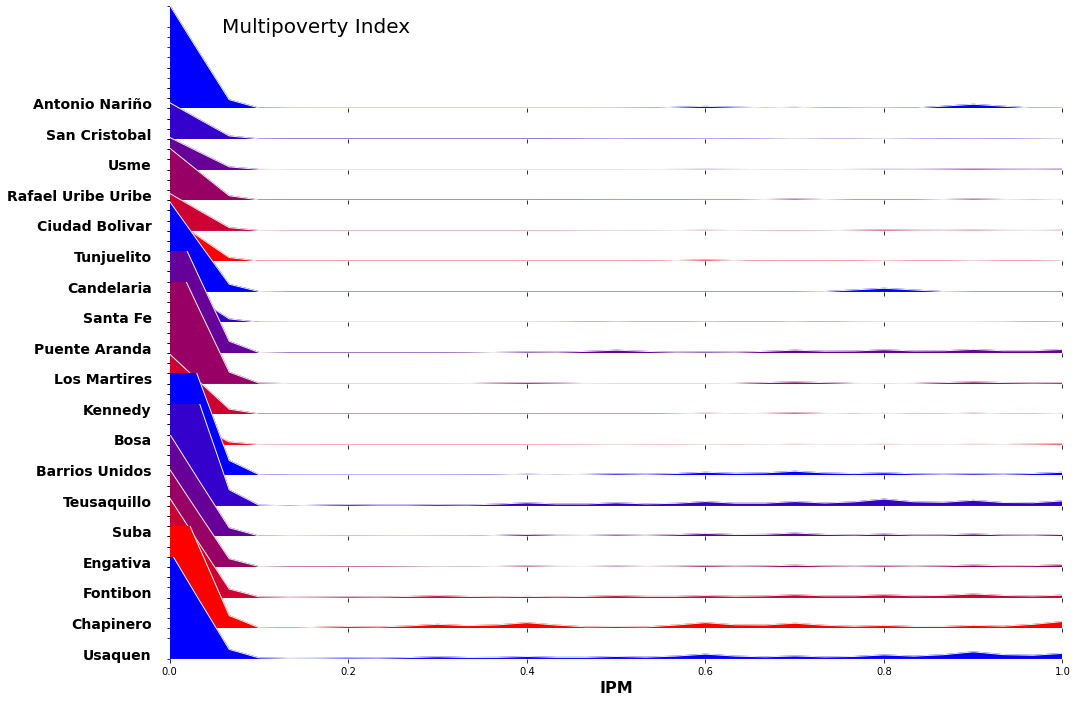

In [123]:
from sklearn.neighbors import KernelDensity

import matplotlib.gridspec as grid_spec
import matplotlib.pyplot as plt
import matplotlib as mpl


colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000', '#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000',
            '#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000', '#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']


localidades_list = shp_df.localidad.unique()

gs = grid_spec.GridSpec(len(localidades_list),1)
fig = plt.figure(figsize=(16, 12))

i = 0

ax_objs = []
for loc in localidades_list:
    x = np.array(shp_df[shp_df.localidad == loc].IPM)
    x_d = np.linspace(0,100, 3000)

    kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    ax_objs[-1].set_ylim(0,2.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(localidades_list)-1:
        ax_objs[-1].set_xlabel("IPM", fontsize=16,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top", "right", "left", "bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_country = loc.replace(" ","\n")
    ax_objs[-1].text(-0.02,0, loc,fontweight="bold",fontsize=14,ha="right")
    i += 1

gs.update(hspace=-0.7)

fig.text(0.17,0.85, "Multipoverty Index", fontsize=20)

plt.tight_layout()
plt.show()